# Introduction To Capstone 

## NBA Exploration 



https://www.kaggle.com/noahgift/nba-team-valuation-exploration/data
This data set compares on the court performance in the NBA during the 2016-2017 Season with Salary, Twitter engagement, and Wikipedia Traffic.For this assignment I wanted to explore this NBA dataset to answer these three questions? 

1. Does salary influence player performance ?
2. Does performance influence social power for players ?
3. Do all teams in the  NBA each have a franchise player ?


In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import linregress

%matplotlib inline

In [16]:
#Dataset 
df = pd.read_csv('~/Desktop/social-power-nba/nba_2017_players_with_salary_wiki_twitter.csv')
df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


In [17]:
df.describe() ##look at measures of Central Tendency and Dispersion of the dataset 

,Unnamed: 0,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,232.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,236.000000,236.000000
mean,119.000000,195.401674,26.405858,23.139749,3.843515,8.482008,0.447686,0.952720,2.672803,0.303026,...,0.083640,-0.303975,3.449958,9.558996,98.544184,30.765690,8.091841,754.596234,237.466102,91.817797
std,69.137544,133.471733,4.433274,8.525964,2.280395,4.795601,0.070974,0.805798,2.066066,0.120666,...,1.607305,2.654697,4.204438,3.590322,2.648361,14.330563,6.955577,1699.982292,1025.210355,335.474533
min,0.000000,1.000000,19.000000,4.400000,0.200000,1.100000,0.200000,0.000000,0.000000,0.000000,...,-3.390000,-6.600000,-2.320000,-0.400000,91.120000,1.000000,0.060000,2.000000,0.000000,0.000000
25%,59.500000,77.500000,23.000000,16.350000,2.000000,4.750000,0.405000,0.300000,1.000000,0.283750,...,-1.145000,-2.135000,0.250000,7.250000,97.085000,21.000000,2.580000,146.500000,4.000000,8.000000
50%,119.000000,173.000000,26.000000,24.000000,3.400000,7.600000,0.444000,0.800000,2.400000,0.342000,...,-0.040000,-0.780000,1.860000,8.900000,98.430000,31.000000,5.370000,324.500000,22.500000,15.000000
75%,178.500000,306.500000,29.000000,30.600000,5.200000,11.250000,0.477500,1.500000,3.950000,0.373500,...,1.120000,1.230000,5.390000,11.700000,100.130000,40.000000,12.095000,642.750000,81.625000,47.875000
max,238.000000,475.000000,40.000000,37.800000,10.300000,24.000000,0.671000,4.100000,10.000000,0.538000,...,6.020000,8.420000,20.430000,23.000000,106.860000,66.000000,30.960000,17570.500000,12278.000000,2941.000000


# Question 1 - Does salary influence player performance ?

We will use the salary as are x variable and pie score as are y. 
The pie score is short for Player Impact Estimation. We want to see if there is a correalation between these two variables.We have discovered that the mean pie score is 9.55  and we know that players that make over 20 million or more are usually very good or the best player on their given team. 





 Do players making over 20 million or more have a pie score greater or equal to 9.55 ? 

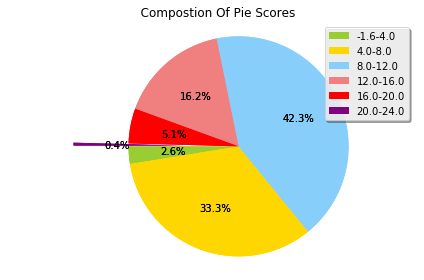

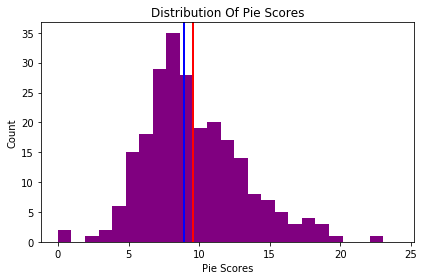

In [18]:
Pie = df['PIE'].astype(float) # convert to float 
a =df[(df['PIE'] > -1.6) & (df['PIE'] < 4.0)]  # breakdown categories for the pie chart 
b =df[(df['PIE'] > 4.0) & (df['PIE'] < 8.0)]
c =df[(df['PIE'] > 8.0) & (df['PIE'] < 12.0)]
d =df[(df['PIE'] > 12.0) & (df['PIE'] < 16.0)]
e =df[(df['PIE'] > 16.0) & (df['PIE'] < 20.0)]
f  =df[(df['PIE'] > 20.0) & (df['PIE'] < 24.0)]

# find the length of each category and form a list 
total_pie = [len(a),len(b),len(c),len(d),len(e),len(f)]

# Graph Pie chart 
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.5)
label =['-1.6-4.0','4.0-8.0','8.0-12.0','12.0-16.0','16.0-20.0','20.0-24.0']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','purple']
patches = plt.pie(total_pie,colors = colors, autopct='%1.1f%%', explode = explode, startangle=180)

plt.pie(total_pie,autopct='%1.1f%%',colors = colors, explode = explode, startangle=180)
plt.axis('equal')
plt.title("   Compostion Of Pie Scores")
plt.legend(loc='upper right', labels = label, shadow=True)
plt.tight_layout()
plt.show()


# Graph Histogram 
plt.hist(df["PIE"],bins = 25, range=(0.0,24),color ="purple")
plt.xlabel('Pie Scores')
plt.ylabel("Count")
plt.title("Distribution Of Pie Scores")
plt.axvline(df["PIE"].mean(), color='r', linestyle='solid', linewidth=2) #RED LINE IS MEAN
plt.axvline(df["PIE"].median(), color='b', linestyle='solid', linewidth=2)# BLUE LINE IS MEDIAN
 

plt.tight_layout()
plt.show()


From the pie chart we are able to tell that 42.3% of basketball players in the given dataset have a pie score between 8.0-12.0.If we look at our histogram we can see how our distribution of pie scores looks bimodal and slightly skewed. I decided to draw a vertical line for the mean and median to decide which will be a better central tendency measurement to use. I found out that the median was closer to the middle of the distribution than the mean. Now that we have looked at the compositon of our data. We want to check if there is any correlation between pie scores and salary. We will test this out by using a scatter plot. 

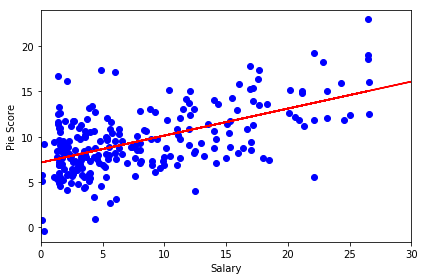

In [19]:
# Draw scatter plot 
x= df['SALARY_MILLIONS']
y= df['PIE']

plt.scatter(x= df['SALARY_MILLIONS'],y= df['PIE'], color = 'blue')
plt.ylim(-1.6,24.0)
plt.xlim(0,30)
plt.xlabel('Salary')
plt.ylabel("Pie Score")



# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")

plt.tight_layout()
plt.show()



The scatter plot shows a weak positive correlation between salary and pie score of the nba players given in the dataset.We can see on the graph that  the pie score tends to increase as the salary  increases. Players with a salary over 20 million tend to have very high pie scores based on the scatter plot. Even though there is a somewhat of a correlation does not mean the information is significant enough to make an inference. We will use a t-test to determine if what we found is significant enough to make an inference on the population at a .05 significance level.  

In [20]:
print(ttest_ind(df['PIE'],df['SALARY_MILLIONS'],equal_var= False))


Ttest_indResult(statistic=2.8976724288550573, pvalue=0.0039918512622180054)


After performing our t-test we have discovered that are p-value < .05. This tells us that there is a strong likelihood 
that this correaltion is significant at a 95% confindence level. 

# Question 2 -Does performance influence social power for players ?

For this question we want to see if players with higher performances during the season increases there social capital. 
I decided to break down this problem and only look at point guards in the league. I will gauge there performances based on two variables which will be FG%, 3P%. I will compare these variables to Pageviews and the amount of retweets a individual receives will determine there social impact based on performance. First lets grab our dataset.

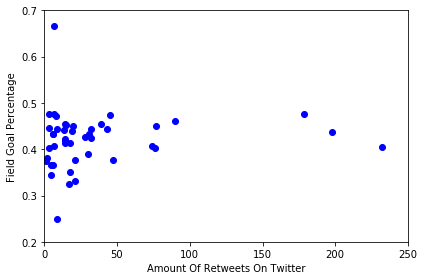

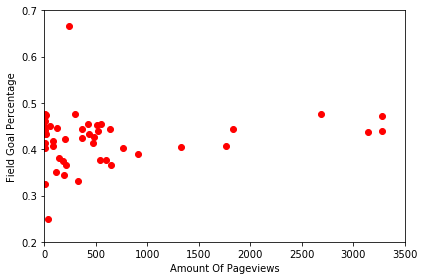

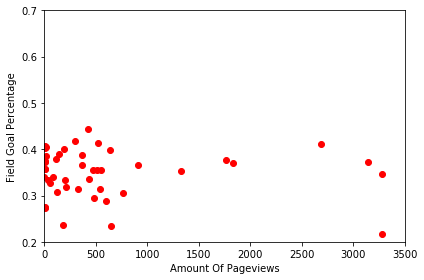

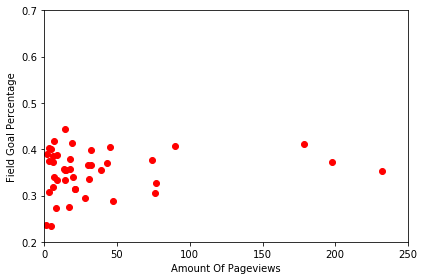

In [21]:
#Grab only PG from dataset 
point_guards =  df[df['POSITION'].str.contains("PG", na=False)]

#draw scatter plot for amount of retweets and FG%
plt.scatter(x= point_guards['TWITTER_RETWEET_COUNT'],y= point_guards['FG%'], color = 'blue') 
plt.xlim(0,250)
plt.ylim(.2,.7)
plt.xlabel("Amount Of Retweets On Twitter")
plt.ylabel("Field Goal Percentage")
plt.tight_layout()


plt.show()

#draw scatter plot for amount of pageviews and FG%

plt.scatter(x= point_guards['PAGEVIEWS'],y= point_guards['FG%'], color = 'red') 
plt.xlim(0,3500)
plt.ylim(.2,.7)
plt.xlabel("Amount Of Pageviews")
plt.ylabel("Field Goal Percentage")
plt.tight_layout()
plt.show()

#draw scatter plot for amount of pageviews and 3P%
plt.scatter(x= point_guards['PAGEVIEWS'],y= point_guards['3P%'], color = 'red') 
plt.xlim(0,3500)
plt.ylim(.2,.7)
plt.xlabel("Amount Of Pageviews")
plt.ylabel("Field Goal Percentage")
plt.tight_layout()
plt.show()

#draw scatter plot for amount of retweets and 3P%
plt.scatter(x= point_guards['TWITTER_RETWEET_COUNT'],y= point_guards['3P%'], color = 'red') 
plt.xlim(0,250)
plt.ylim(.2,.7)
plt.xlabel("Amount Of Pageviews")
plt.ylabel("Field Goal Percentage")
plt.tight_layout()
plt.show()




Based on all the scatter plots shown i see no correalation between the amount of pageviews and retweets with FG% and 3P%. So lets further are research by adding two more variables to see if they is a relationship between the two. The two new variables i chose were player rank in the NBA and player salary. Lets see if these two new variables will show better results. 

In [22]:
df.describe()


,Unnamed: 0,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,232.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,236.000000,236.000000
mean,119.000000,195.401674,26.405858,23.139749,3.843515,8.482008,0.447686,0.952720,2.672803,0.303026,...,0.083640,-0.303975,3.449958,9.558996,98.544184,30.765690,8.091841,754.596234,237.466102,91.817797
std,69.137544,133.471733,4.433274,8.525964,2.280395,4.795601,0.070974,0.805798,2.066066,0.120666,...,1.607305,2.654697,4.204438,3.590322,2.648361,14.330563,6.955577,1699.982292,1025.210355,335.474533
min,0.000000,1.000000,19.000000,4.400000,0.200000,1.100000,0.200000,0.000000,0.000000,0.000000,...,-3.390000,-6.600000,-2.320000,-0.400000,91.120000,1.000000,0.060000,2.000000,0.000000,0.000000
25%,59.500000,77.500000,23.000000,16.350000,2.000000,4.750000,0.405000,0.300000,1.000000,0.283750,...,-1.145000,-2.135000,0.250000,7.250000,97.085000,21.000000,2.580000,146.500000,4.000000,8.000000
50%,119.000000,173.000000,26.000000,24.000000,3.400000,7.600000,0.444000,0.800000,2.400000,0.342000,...,-0.040000,-0.780000,1.860000,8.900000,98.430000,31.000000,5.370000,324.500000,22.500000,15.000000
75%,178.500000,306.500000,29.000000,30.600000,5.200000,11.250000,0.477500,1.500000,3.950000,0.373500,...,1.120000,1.230000,5.390000,11.700000,100.130000,40.000000,12.095000,642.750000,81.625000,47.875000
max,238.000000,475.000000,40.000000,37.800000,10.300000,24.000000,0.671000,4.100000,10.000000,0.538000,...,6.020000,8.420000,20.430000,23.000000,106.860000,66.000000,30.960000,17570.500000,12278.000000,2941.000000


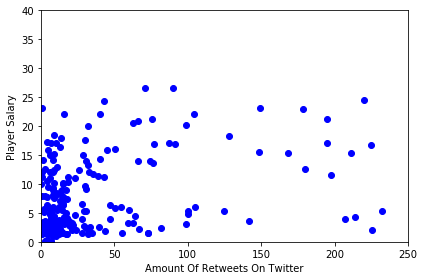

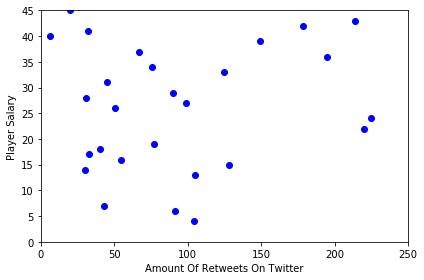

In [23]:
# draw scatter plots for Salary and Player rank
x1 = df['TWITTER_RETWEET_COUNT']
y1 = df['SALARY_MILLIONS']
plt.scatter(x= df['TWITTER_RETWEET_COUNT'],y= df['SALARY_MILLIONS'], color = 'blue') 
plt.xlim(0,250)
plt.ylim(0.0,40.0)
plt.xlabel("Amount Of Retweets On Twitter")
plt.ylabel("Player Salary")
plt.tight_layout()
plt.show()

plt.scatter(x= df['TWITTER_RETWEET_COUNT'],y= df['Rk'], color = 'blue') 
plt.xlim(0,250)
plt.ylim(0,45)
plt.xlabel("Amount Of Retweets On Twitter")
plt.ylabel("Player Salary")
plt.tight_layout()
plt.show()



Again there is no correalation between these two new given variables. We can imply that none of these variables have a correalation with the variables x which were the amount of retweets and pageviews a player received. 

# # Question 3 - Do all teams in the  NBA each have a franchise player ?

First lets break this question down. Lets define what a franchise player is a franchise player is somebody who gets good individual stats, is a high-level contributor to the team, and is someone who has a good to great overall skill set with maybe one or two elite skills. Now that we know some characteristics of what a franchise player embodies we can now look at our dataset and determine if each team has at least 1 franchise player. A key variable that we can use to determine if a player is considered a franchise player is the pie score. I will only consider players that are above the 80th percentile of pie scores. Lets first pull our dataset.

In [24]:
#Grab dataset 
df2 = pd.read_csv('~/Desktop/social-power-nba/nba_2017_pie.csv')
#Grab pie scores,player names, team_name 
teams = df2[['TEAM','PLAYER','PIE']]
count = teams['TEAM'].value_counts(sort=True) # number of players each team had


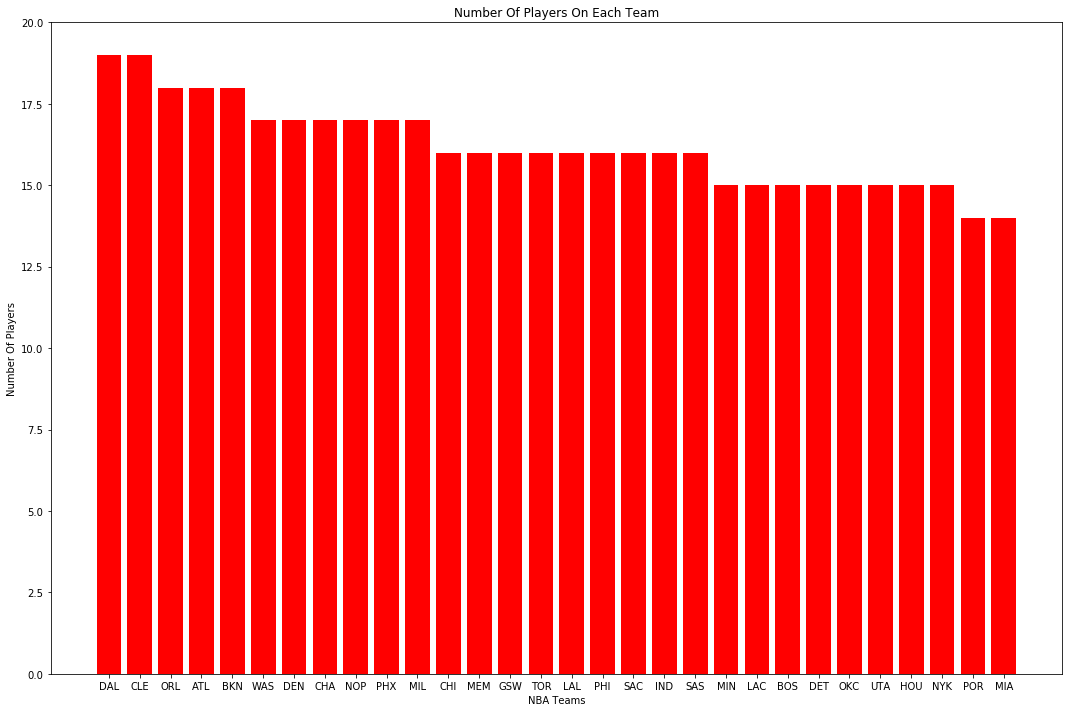

In [25]:

# TEAM NAMES in same format as count 
team_names= ['DAL','CLE','ORL','ATL','BKN','WAS','DEN','CHA','NOP','PHX',
             'MIL','CHI','MEM','GSW','TOR','LAL','PHI','SAC','IND','SAS','MIN','LAC','BOS',
             'DET','OKC','UTA','HOU','NYK','POR','MIA']


y_pos = np.arange(len(team_names))

plt.figure(figsize=(15, 10))
plt.bar(y_pos,count.tolist(),align='center',color= "Red")
plt.ylim(0,20)
plt.xticks(y_pos,team_names)
plt.xlabel("NBA Teams")
plt.ylabel("Number Of Players")
plt.title("Number Of Players On Each Team")
plt.tight_layout()
plt.show()


In [26]:
#Grab upper percentile 
upper_percentile = np.percentile(df["PIE"],80)
print(upper_percentile)

12.28


Lets see how many players on each team have a pie score of at least 12.28.


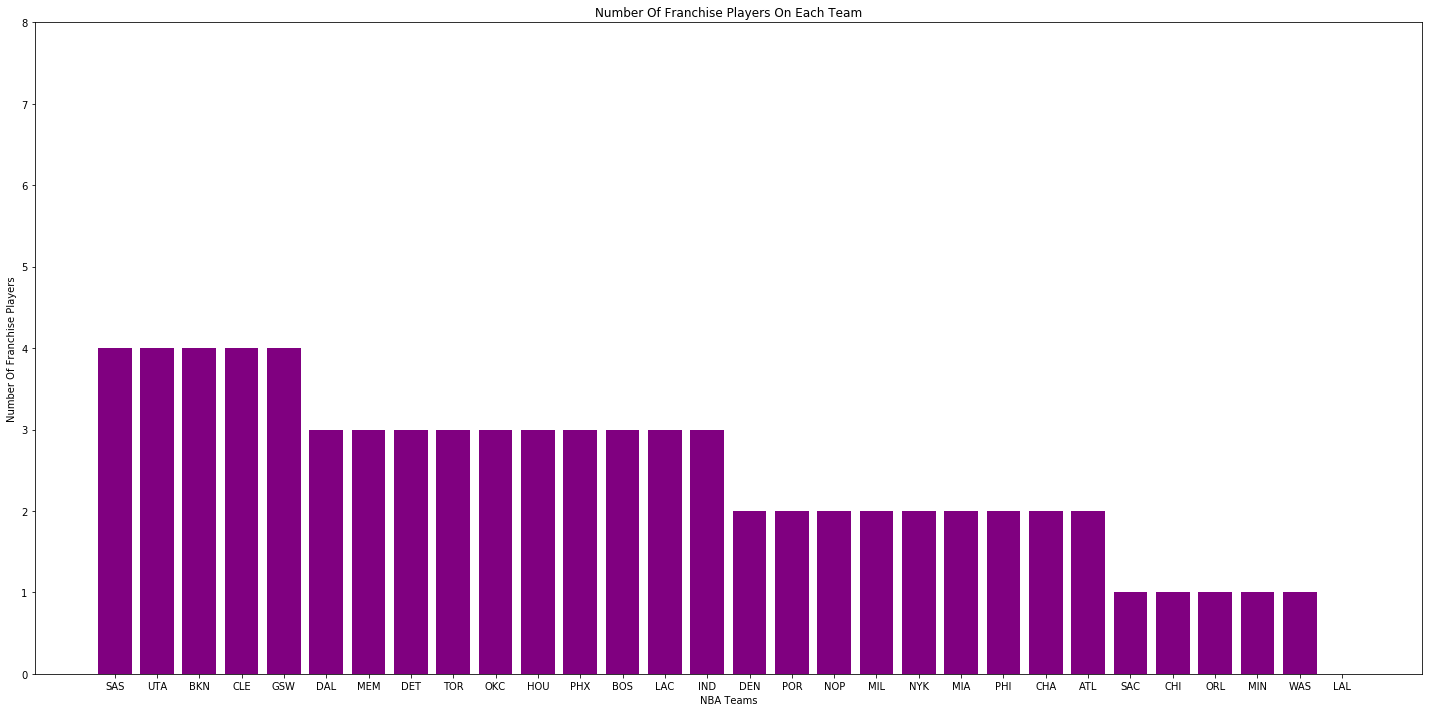

In [27]:
franchise = teams[teams['PIE'] > 12.28]# make new dataset with all players with a pie score over 12.28
count1 = franchise['TEAM'].value_counts() 

y_pos1 = np.arange(30)

# store string of team names with franchise players 
team_names2 =['SAS','UTA','BKN','CLE','GSW','DAL','MEM', 'DET',  'TOR',   'OKC',    'HOU',  'PHX','BOS','LAC','IND','DEN','POR','NOP','MIL','NYK','MIA','PHI','CHA','ATL','SAC',  
 'CHI','ORL','MIN','WAS']

diff  = set(team_names2)^set(team_names2)

team_names2.append('LAL') # find any value that is different from both lists and add to new list
count1 = count1.tolist() # change to list 
count1.append(0) # 0 for value not accounted for in the function above 

plt.figure(figsize=(20, 10))
plt.bar(y_pos1, count1,align='center', color= "purple")
plt.ylim(0,8)
plt.xticks(y_pos,team_names2)
plt.xlabel("NBA Teams")
plt.ylabel("Number Of Franchise Players")
plt.title("Number Of Franchise Players On Each Team")
plt.tight_layout()
plt.show()




                  


We see in this graph that not every team in the NBA has a franchise caliber player but most do in fact only one team did not have a franchise caliber player last season.This team was the Los Angeles Lakers most teams averaged between 2 to 3 franchise caliber players. So what does this tell us? My assumption is that teams with more franchise players tend to have better winning regular season records.Lets take a look at this. 

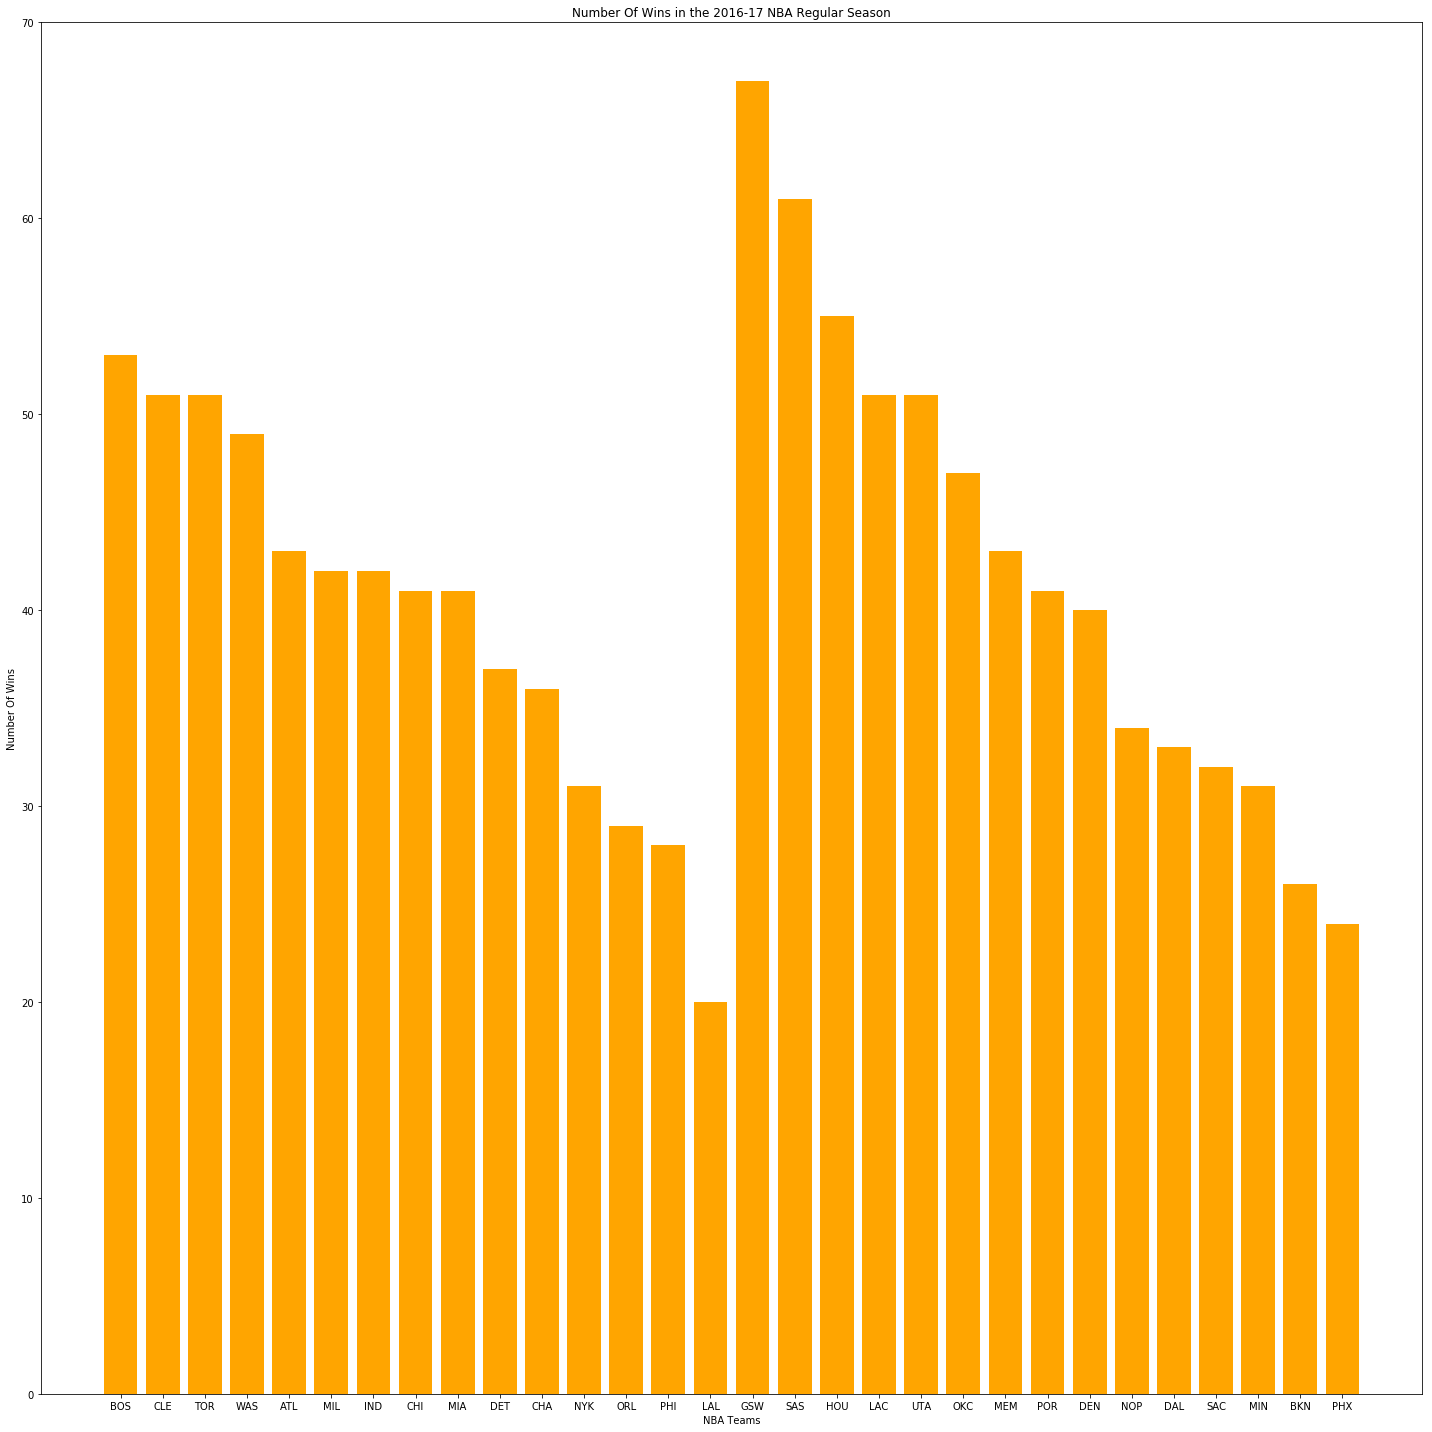

In [28]:
#First we most grab and organize our dataset 
eteam_records = pd.read_csv('~/Desktop/social-power-nba/convertcsv.csv')
wteam_records = pd.read_csv('~/Desktop/social-power-nba/convertcsv (1).csv')
team_rec = pd.concat([eteam_records,wteam_records]) # merge df
e = team_rec[['Eastern Conference','W']].dropna(axis=0,how='any') # split DF based on conference and drop NAN values
w = team_rec[['Western Conference','W']].dropna(axis=0,how='any')
                                                                                                     
                                                                                                          
e.rename(columns = {'Eastern Conference':'Team'}, inplace = True) # rename conference column to team
w.rename(columns = {'Western Conference':'Team'}, inplace = True)
team_rec = pd.concat([e,w]) # merge df again

storage = team_rec['W'].tolist() # list of win values 
name =['BOS','CLE','TOR','WAS','ATL','MIL','IND','CHI','MIA','DET','CHA','NYK',
'ORL','PHI','LAL','GSW','SAS','HOU','LAC','UTA','OKC','MEM','POR','DEN','NOP','DAL','SAC','MIN','BKN','PHX']   

# Draw Bar Graph 
y_pos2 = np.arange(30) 
plt.figure(figsize=(20, 20))
plt.bar(y_pos2, storage,align='center', color= "orange")
plt.ylim(0,70)
plt.xticks(y_pos2,name)
plt.xlabel("NBA Teams")
plt.ylabel("Number Of Wins")
plt.title("Number Of Wins in the 2016-17 NBA Regular Season")
plt.tight_layout()
plt.show()
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                                          
                            
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                                          
                                                                                                                                                                  

This graph shows us the amount of wins each team had at the end of the season we want to see if teams with more franchise caliber players had overall better seasons.Lets take the best and worst team at the end of last season and see how that relates with our question above. The best team was GSW and they had 67 wins and with 4 franchise caliber players on there team and the worst team was the Los Angeles Lakers and they had a total of 20 wins and they had 0 franchise players. This will make sense why the Lakers had the number 2 overall draft pick after the season. This does not necessarily mean that there is a correalation between how many franchise caliber players a team has  and the number of wins a team receives at the end of the season. This is just an assumption. 

# Conclusion


1. Does salary influence player performance ?
   Yes, we can assume that there is a correalation between salary and player performance based on the graph and the t-test.
2. Does performance influence social power for players ?
 No, we found out based on the the graphs there was no correaltion between a players performance and social influence. 
3. Do all teams in the  NBA each have a franchise player ?
No, we found out that the Los Angeles Lakers lacked a franchise player. Which explains there losing record this season and a reason why they had the 2nd overall pick in the 2017 NBA draft. 



# Further Reasearch 


For further reasearch I will consider the distrubution of the data to see if they are all normally distrubuted or not. I will also consider certain biases that can skew my results such as seeing if all the teams have the same number of players, players who were injured during the season, players who were traded and so on. These are all factors that will need to be considered because they can greatly impact your results in your analysis. 